In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("House_Prices _Full.csv")
df.head()
df.shape

(4600, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df = df[df['city'] == 'Seattle']
df.shape

(1573, 18)

In [5]:
df.drop(['country','city','street','date','waterfront'],axis = 1,inplace=True)

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2384000.0,5.0,2.5,3650,9050,2.0,4,5,3370,280,1921,0,WA 98119
5,490000.0,2.0,1.0,880,6380,1.0,0,3,880,0,1938,1994,WA 98115
9,640000.0,4.0,2.0,1520,6200,1.5,0,3,1520,0,1945,2010,WA 98115
11,1400000.0,4.0,2.5,2920,4000,1.5,0,5,1910,1010,1909,1988,WA 98105
13,365000.0,3.0,1.0,1090,6435,1.0,0,4,1090,0,1955,2009,WA 98106


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['statezip'] = le.fit_transform(df['statezip'])

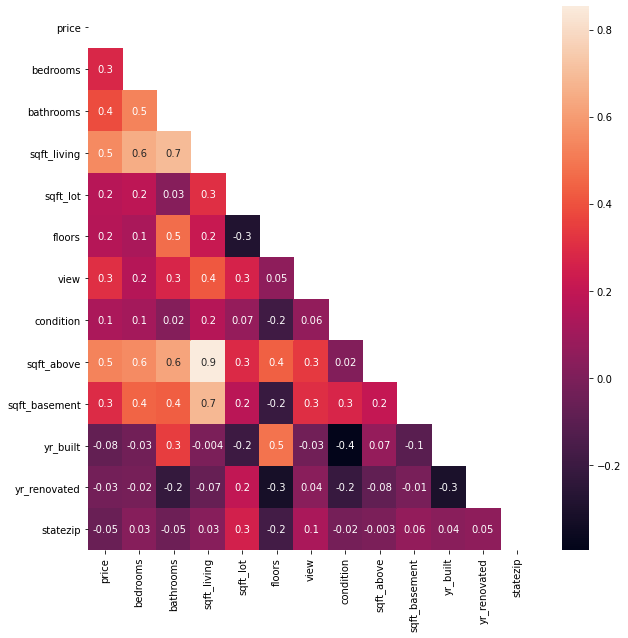

In [8]:
import seaborn as sn
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
matrix = np.triu(df.corr())
sn.heatmap(corrMatrix, annot=True,fmt='.1g',mask=matrix)
plt.show()

## SIMPLE LINEAR REGRESSION

In [9]:
X = df[['sqft_living']]
y = df[['price']]

In [10]:
model = linear_model.LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.score(X_test, y_test)

0.4751591860174539

In [15]:
y_pred = model.predict(X_test)  
x_pred = model.predict(X_train)  

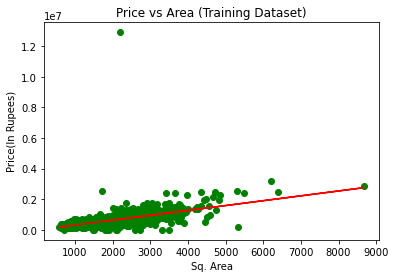

In [16]:
import matplotlib.pyplot as mtp
mtp.scatter(X_train, y_train, color="green")   
mtp.plot(X_train, x_pred, color="red")    
mtp.title("Price vs Area (Training Dataset)")  
mtp.xlabel("Sq. Area")  
mtp.ylabel("Price(In Rupees)")  
mtp.show()   

## MULTIPLE LINEAR REGRESSION 

In [17]:
X = df.drop(['price','sqft_lot','floors','yr_renovated'],axis = 1)
y = df['price']

In [18]:
model = linear_model.LinearRegression()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model.score(X_test, y_test)

0.6217301888857333